# **Delhivery - Business Case Study**

**Problem Statement**

We have been given data on trips performed by parcels for Delhivery, which has attributes like trip_creation_time, routes,  source and destination places, and open-source routing engine time. We need to clean, sanitize and manipulate data and get useful features and provide data to help them build forecasting models.

Importing required Python Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from scipy.special import comb
from scipy.stats import binom
from scipy.stats import norm,t
from scipy.stats import poisson, expon,geom, ttest_1samp, ttest_ind,ttest_ind_from_stats,boxcox
from scipy.stats import shapiro, levene, kruskal, chi2, chi2_contingency,pearsonr, spearmanr
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder

Loading our dataset

In [ ]:
#Loading of csv file
df=pd.read_csv("delhivery_data.csv")
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


# Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category', missing value detection, statistical summary

In [ ]:
df.shape #Shape of dataset

(144867, 24)

In [ ]:
df.info() #datatype info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
df.nunique() # number of unique values in columns

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [ ]:
df.isna().sum() #missing values in columns

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [ ]:
df.describe() #Statistical summary of the dataset

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [ ]:
df.describe(include=object)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [ ]:
#Checking for source center value for which source name is null
df[(df["source_name"].notnull()) & (df["source_center"].isin(df[df["source_name"].isnull()]["source_center"]))]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


In [ ]:
#Checking for destination center value for which destination name is null
df[(df["destination_name"].notnull()) & (df["destination_center"].isin(df[df["destination_name"].isnull()]["destination_center"]))]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor


In [ ]:
#Here we can observe that minimum value of segment_actual_time and segment_factor is negative,
#which seems false values as time can not be negative, so we will drop that data
df.drop(df[df["segment_actual_time"]<0].index, inplace=True)

In [ ]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000,144846.000000
mean,961.226537,232.911057,234.057171,416.908724,213.853002,284.750969,2.120190,36.207427,18.507304,22.828528,2.219084
std,1036.993595,344.740981,344.974984,598.085058,307.997702,421.101831,1.715508,53.561259,14.775870,17.860268,4.847144
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,0.000000,0.000000,0.000000,-1.000000
25%,161.000000,22.000000,23.354927,51.000000,27.000000,29.909925,1.604288,20.000000,11.000000,12.070100,1.347826
50%,449.000000,66.000000,66.126234,132.000000,64.000000,78.524600,1.857143,29.000000,17.000000,23.513000,1.684211
75%,1634.000000,286.000000,286.706673,513.000000,257.000000,343.062075,2.213589,40.000000,22.000000,27.812975,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000


# Dataset Information

data: It contains whether the data is testing or training type

trip_creation_time: It is the timestamp of trip_creation.  It ranges from '2018-09-12 00:25:19.499696' to '2018-10-03 23:59:42.701692'

oute_schedule_uuid: it is unique_id for particular route schedule

route type: It contains whether the route is Full Truck Load or Carting type

trip_uuid:  It is a unique id associated with a particular trip

source_center: It is the ID of the origin of the trip

source_name: Its the name of the origin of the trip

destination_center: It is the ID of the destination of the trip

destination_name: It is the name of the destination of the trip

od_start_time: It is the trip start time

od_end_time: It is the trip end time

Start_scan_to_end_scan: It gives the time taken to deliver from source to destination. It ranges from 20 to 7898.

is_cutoff: It is an unknown field, which is boolean

cutoff_factor: It is the rounded value of the actual_distance_to_destination, it ranges from 9 to 1927

cutoff_timestamp: It is an unknown field

actual_distance_to_destination: It is the distance between the source and destination warehouses, it ranges from 9.00 to 1927.44

actual_time: It contains the actual time taken to complete the delivery (cumulative), it ranges from 9 to 4532.

osrm_time: It is an open-source routing engine time calculator which computes the shortest path between points in a given
map and gives the time (cumulative), it ranges from 6 to 1686

osrm_distance: It contains the distance to the destination based on osrm, it ranges from 9.00 to 2326.199

factor: It is a ratio of actual_time to osrm_time, it ranges from 0.144 to 77.38.

segment_actual_time: It is a segment time, a time taken by a subset of package delivery, It ranges from -244 to 3051

segment_osrm_time: It contains the orsm time taken by a subset of the package delivery. It ranges from 0 to 1611

segment_osrm_distance: It contains OSRM distance, the distance covered by a subset of package delivery, it ranges from 0 to 2191.40

segment_factor: It is a ratio between segment_actual_time to segment_osrm_time, it ranges from -23.544 to 574.25

# Univariate Analysis

<AxesSubplot: xlabel='start_scan_to_end_scan', ylabel='Count'>

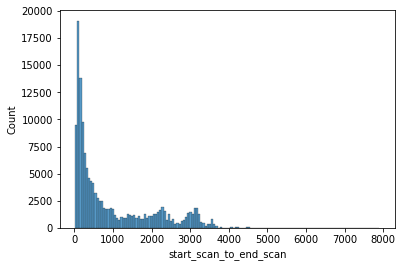

In [ ]:
#Histplot for start_to_scan_to_end_scan attribute
sns.histplot(df["start_scan_to_end_scan"])

<AxesSubplot: xlabel='cutoff_factor', ylabel='Count'>

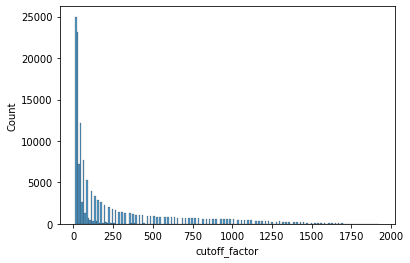

In [ ]:
#Histplot for cutoff_factor attribute
sns.histplot(df["cutoff_factor"])

<AxesSubplot: xlabel='actual_distance_to_destination', ylabel='Count'>

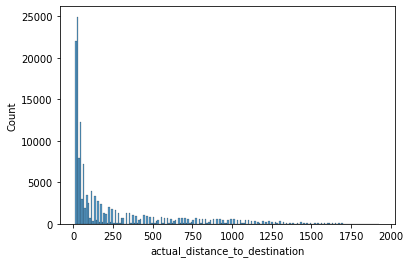

In [ ]:
#Histplot for actual_distance_to_destination attribute
sns.histplot(df["actual_distance_to_destination"])

<AxesSubplot: xlabel='segment_actual_time', ylabel='Count'>

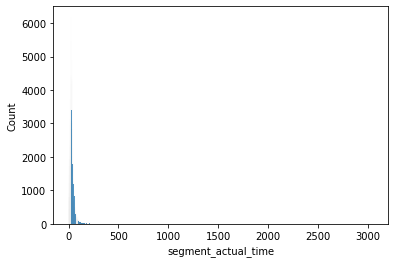

In [ ]:
#Histplot for segment_actual_time attribute
sns.histplot(df["segment_actual_time"])

<AxesSubplot: xlabel='segment_osrm_time', ylabel='Count'>

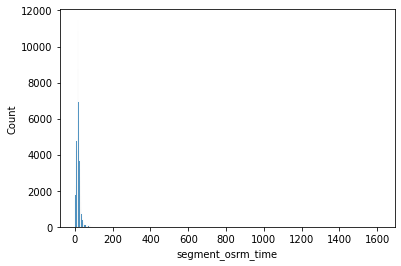

In [ ]:
#Histplot for segment_osrm_time attribute
sns.histplot(df["segment_osrm_time"])

<AxesSubplot: xlabel='actual_time', ylabel='Count'>

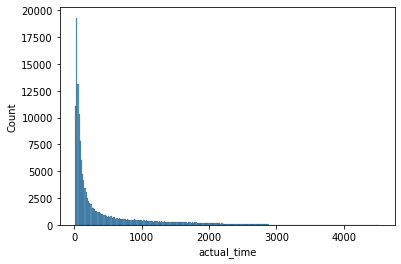

In [ ]:
#Histplot for actual_time attribute
sns.histplot(df["actual_time"])

<AxesSubplot: xlabel='osrm_distance', ylabel='Count'>

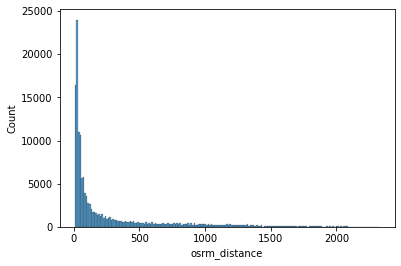

In [ ]:
#Histplot for osrm_distance attribute
sns.histplot(df["osrm_distance"])

<AxesSubplot: xlabel='segment_osrm_distance', ylabel='Count'>

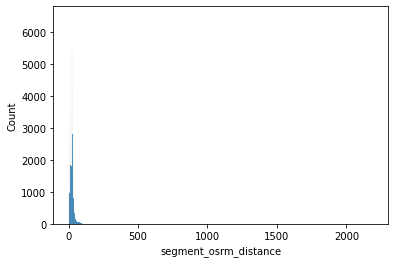

In [ ]:
#Histplot for segment_osrm_distance attribute
sns.histplot(df["segment_osrm_distance"])

# Bivariate Analysis

<AxesSubplot: xlabel='actual_distance_to_destination', ylabel='actual_time'>

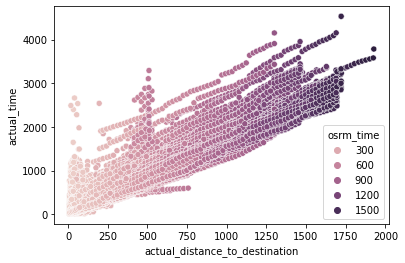

In [ ]:
#Scatterplot between actual-distance_to_destination, actual_time and osrm_time
sns.scatterplot(data=df, x="actual_distance_to_destination",y="actual_time", hue="osrm_time")

<AxesSubplot: xlabel='segment_osrm_distance', ylabel='segment_osrm_time'>

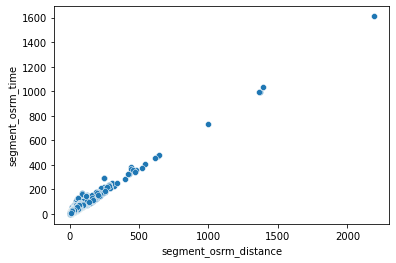

In [ ]:
#scatterplot between segment_osrm_distance and segment_osrm_time
sns.scatterplot(data=df, x="segment_osrm_distance",y="segment_osrm_time")

<AxesSubplot: xlabel='segment_actual_time', ylabel='segment_osrm_time'>

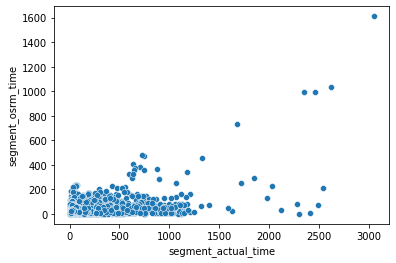

In [ ]:
#scatterplot between segment_actual_time and segment_osrm_time
sns.scatterplot(data=df, x="segment_actual_time",y="segment_osrm_time")

In [ ]:
#correlation in dataframe
df.corr()

C:\Users\Pipaliya\AppData\Local\Temp\ipykernel_8836\2340352341.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
start_scan_to_end_scan,1.000000,0.299115,0.784656,0.784988,0.785924,0.785283,0.784120,-0.023192,0.093372,0.219844,0.306972,-0.020225
is_cutoff,0.299115,1.000000,0.190819,0.191574,0.168270,0.186485,0.188247,-0.121369,-0.006945,0.216334,0.254661,-0.106518
cutoff_factor,0.784656,0.190819,1.000000,0.999986,0.978719,0.995833,0.997116,-0.064559,0.045063,0.157942,0.231109,-0.031439
actual_distance_to_destination,0.784988,0.191574,0.999986,1.000000,0.978658,0.995872,0.997148,-0.064743,0.045320,0.158836,0.232119,-0.031588
actual_time,0.785924,0.168270,0.978719,0.978658,1.000000,0.977996,0.979398,0.033498,0.124483,0.171480,0.242296,0.017570
osrm_time,0.785283,0.186485,0.995833,0.995872,0.977996,1.000000,0.999119,-0.069081,0.049977,0.177074,0.242288,-0.033038
osrm_distance,0.784120,0.188247,0.997116,0.997148,0.979398,0.999119,1.000000,-0.065391,0.048787,0.169157,0.239672,-0.031786
factor,-0.023192,-0.121369,-0.064559,-0.064743,0.033498,-0.069081,-0.065391,1.000000,0.518451,-0.053154,-0.036724,0.540448
segment_actual_time,0.093372,-0.006945,0.045063,0.045320,0.124483,0.049977,0.048787,0.518451,1.000000,0.433604,0.449167,0.483699
segment_osrm_time,0.219844,0.216334,0.157942,0.158836,0.171480,0.177074,0.169157,-0.053154,0.433604,1.000000,0.948520,-0.068472


C:\Users\Pipaliya\AppData\Local\Temp\ipykernel_8836\3354145055.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

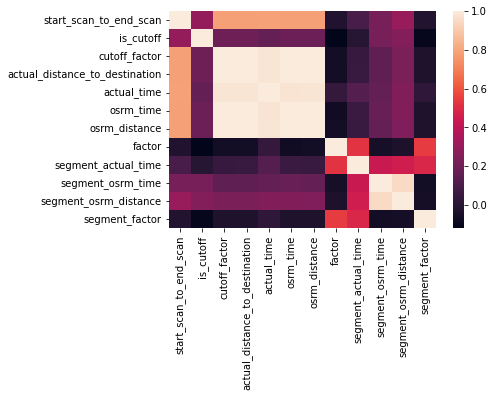

In [ ]:
#heatmap of dataframe
sns.heatmap(df.corr())

# Data Wrangling

In [ ]:
#merging of rows based on trip_id and source and destination details
data=df.groupby(["route_type","trip_uuid","trip_creation_time","source_center","source_name","destination_center","destination_name","od_start_time","od_end_time","start_scan_to_end_scan"]).aggregate({"cutoff_factor":"max","actual_distance_to_destination":"max","segment_actual_time":"sum", "segment_osrm_time":"sum", "actual_time":"max", "osrm_time":"max","osrm_distance":"max","segment_osrm_distance":"sum"}).reset_index()
data

,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,segment_actual_time,segment_osrm_time,actual_time,osrm_time,osrm_distance,segment_osrm_distance
0,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24,24.644021,46.0,26.0,47.0,26.0,28.1994,28.1995
1,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48,48.542890,95.0,39.0,96.0,42.0,56.9116,55.9899
2,Carting,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,17,17.175274,59.0,16.0,59.0,15.0,19.6800,19.8766
3,Carting,trip-153671055416136166,2018-09-12 00:02:34.161600,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 02:12:10.755603,2018-09-12 03:13:03.432532,60.0,15,15.325529,39.0,12.0,40.0,12.0,16.2225,16.2225
4,Carting,trip-153671055416136166,2018-09-12 00:02:34.161600,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),2018-09-12 00:02:34.161600,2018-09-12 02:12:10.755603,129.0,9,9.271519,21.0,11.0,21.0,11.0,11.8422,11.8422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26218,FTL,trip-153861014185597051,2018-10-03 23:42:21.856227,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:42:21.856227,2018-10-04 19:57:34.928573,1215.0,442,442.024575,991.0,425.0,997.0,395.0,545.1256,573.6479
26219,FTL,trip-153861023893369544,2018-10-03 23:43:58.933947,IND382715AAA,Kadi_KaranNGR_D (Gujarat),IND382430AAB,Ahmedabad_East_H_1 (Gujarat),2018-10-04 01:48:54.382343,2018-10-04 04:01:41.425627,132.0,50,50.473578,129.0,55.0,130.0,54.0,61.9571,67.2659
26220,FTL,trip-153861023893369544,2018-10-03 23:43:58.933947,IND384205AAA,Mehsana_Panchot_IP (Gujarat),IND382715AAA,Kadi_KaranNGR_D (Gujarat),2018-10-03 23:43:58.933947,2018-10-04 01:48:54.382343,124.0,34,34.270235,57.0,37.0,57.0,38.0,40.4257,40.4256
26221,FTL,trip-153861118270144424,2018-10-03 23:59:42.701692,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40,40.546740,233.0,42.0,233.0,42.0,52.5303,52.5303


In [ ]:
#Merging rows based on trip_id
data=data.groupby(["route_type","trip_uuid","trip_creation_time"]).aggregate({"source_center":"first","source_name":"first","destination_center":"last",
                                     "destination_name":"last", "od_start_time":"first",
                                     "od_end_time":"last","cutoff_factor":"sum","actual_distance_to_destination":"sum","osrm_distance":"sum",
                                     "start_scan_to_end_scan":"sum", "segment_actual_time":"sum",
                                    "segment_osrm_time":"sum","actual_time":"sum",
                                     "osrm_time":"sum","segment_osrm_distance":"sum"}).reset_index()
data

,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance
0,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,72,73.186911,85.1110,180.0,141.0,65.0,143.0,68.0,84.1894
1,Carting,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17,17.175274,19.6800,100.0,59.0,16.0,59.0,15.0,19.8766
2,Carting,trip-153671055416136166,2018-09-12 00:02:34.161600,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),2018-09-12 02:12:10.755603,2018-09-12 02:12:10.755603,24,24.597048,28.0647,189.0,60.0,23.0,61.0,23.0,28.0647
3,Carting,trip-153671066201138152,2018-09-12 00:04:22.011653,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,9,9.100510,12.0184,98.0,24.0,13.0,24.0,13.0,12.0184
4,Carting,trip-153671066826362165,2018-09-12 00:04:28.263977,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,22,22.424210,28.9203,146.0,64.0,34.0,64.0,34.0,28.9203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,FTL,trip-153861004148234782,2018-10-03 23:40:41.482736,IND814101AAB,Dumka_Dudhani_D (Jharkhand),IND815351AAA,Jamtara_D (Jharkhand),2018-10-04 04:22:21.025250,2018-10-04 02:24:41.382263,167,168.396341,207.4975,428.0,347.0,220.0,349.0,220.0,209.4499
14783,FTL,trip-153861007249500192,2018-10-03 23:41:12.495257,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-10-03 23:41:12.495257,2018-10-04 16:40:41.713085,192,194.552260,229.2052,1017.0,845.0,178.0,847.0,178.0,232.5811
14784,FTL,trip-153861014185597051,2018-10-03 23:42:21.856227,IND206001AAA,Etawah_MhraChng_D (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-05 02:44:50.858859,2018-10-04 19:57:34.928573,835,836.072017,997.7577,2180.0,1660.0,891.0,1674.0,724.0,1166.3614
14785,FTL,trip-153861023893369544,2018-10-03 23:43:58.933947,IND382715AAA,Kadi_KaranNGR_D (Gujarat),IND382715AAA,Kadi_KaranNGR_D (Gujarat),2018-10-04 01:48:54.382343,2018-10-04 01:48:54.382343,84,84.743813,102.3828,256.0,186.0,92.0,187.0,92.0,107.6915


In [ ]:
data.nunique() # Unique values in the dataset

route_type                            2
trip_uuid                         14787
trip_creation_time                14787
source_center                       930
source_name                         930
destination_center                 1035
destination_name                   1035
od_start_time                     14787
od_end_time                       14787
cutoff_factor                       684
actual_distance_to_destination    14771
osrm_distance                     14706
start_scan_to_end_scan             2203
segment_actual_time                1887
segment_osrm_time                  1242
actual_time                        1850
osrm_time                           827
segment_osrm_distance             14724
dtype: int64

In [ ]:
data.isna().sum() #nullvalues in the data frame

route_type                        0
trip_uuid                         0
trip_creation_time                0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
cutoff_factor                     0
actual_distance_to_destination    0
osrm_distance                     0
start_scan_to_end_scan            0
segment_actual_time               0
segment_osrm_time                 0
actual_time                       0
osrm_time                         0
segment_osrm_distance             0
dtype: int64

In [ ]:
data.describe() #statistical summary of dataset

,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance
count,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.00000
mean,163.379523,164.290730,204.631953,529.442754,353.118618,180.482924,356.316224,161.667072,222.66823
std,305.558531,305.678137,370.953239,658.286556,556.439155,314.622727,561.528033,272.406218,416.76499
min,9.000000,9.002461,9.072900,23.000000,9.000000,6.000000,9.000000,6.000000,9.07290
25%,22.000000,22.840056,30.875600,149.000000,66.000000,30.000000,67.000000,29.000000,32.57885
50%,48.000000,48.376934,65.575600,279.000000,147.000000,65.000000,148.000000,60.000000,69.78420
75%,162.000000,163.685113,207.087600,632.000000,364.000000,184.000000,367.000000,168.000000,216.46395
max,2185.000000,2187.483994,2840.081000,7898.000000,6230.000000,2564.000000,6265.000000,2032.000000,3523.63240


In [ ]:
data.describe(include=object)

,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time
count,14787,14787,14787,14787,14787,14787,14787,14787,14787
unique,2,14787,14787,930,930,1035,1035,14787,14787
top,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591
freq,8906,1,1,1052,1052,821,821,1,1


# Feature Generation

In [ ]:
#Feature generation like source_state and destination_state
data["source_state"]=data["source_name"].apply(lambda x: str(x).split("(")[1][:-1])
data["destination_state"]=data["destination_name"].apply(lambda x: str(x).split("(")[1][:-1])
data

,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,source_state,destination_state
0,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,72,73.186911,85.1110,180.0,141.0,65.0,143.0,68.0,84.1894,Karnataka,Karnataka
1,Carting,trip-153671046011330457,2018-09-12 00:01:00.113710,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17,17.175274,19.6800,100.0,59.0,16.0,59.0,15.0,19.8766,Maharashtra,Maharashtra
2,Carting,trip-153671055416136166,2018-09-12 00:02:34.161600,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),2018-09-12 02:12:10.755603,2018-09-12 02:12:10.755603,24,24.597048,28.0647,189.0,60.0,23.0,61.0,23.0,28.0647,Tamil Nadu,Tamil Nadu
3,Carting,trip-153671066201138152,2018-09-12 00:04:22.011653,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,9,9.100510,12.0184,98.0,24.0,13.0,24.0,13.0,12.0184,Tamil Nadu,Tamil Nadu
4,Carting,trip-153671066826362165,2018-09-12 00:04:28.263977,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,22,22.424210,28.9203,146.0,64.0,34.0,64.0,34.0,28.9203,Karnataka,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,FTL,trip-153861004148234782,2018-10-03 23:40:41.482736,IND814101AAB,Dumka_Dudhani_D (Jharkhand),IND815351AAA,Jamtara_D (Jharkhand),2018-10-04 04:22:21.025250,2018-10-04 02:24:41.382263,167,168.396341,207.4975,428.0,347.0,220.0,349.0,220.0,209.4499,Jharkhand,Jharkhand
14783,FTL,trip-153861007249500192,2018-10-03 23:41:12.495257,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-10-03 23:41:12.495257,2018-10-04 16:40:41.713085,192,194.552260,229.2052,1017.0,845.0,178.0,847.0,178.0,232.5811,Bihar,Bihar
14784,FTL,trip-153861014185597051,2018-10-03 23:42:21.856227,IND206001AAA,Etawah_MhraChng_D (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-05 02:44:50.858859,2018-10-04 19:57:34.928573,835,836.072017,997.7577,2180.0,1660.0,891.0,1674.0,724.0,1166.3614,Uttar Pradesh,Uttar Pradesh
14785,FTL,trip-153861023893369544,2018-10-03 23:43:58.933947,IND382715AAA,Kadi_KaranNGR_D (Gujarat),IND382715AAA,Kadi_KaranNGR_D (Gujarat),2018-10-04 01:48:54.382343,2018-10-04 01:48:54.382343,84,84.743813,102.3828,256.0,186.0,92.0,187.0,92.0,107.6915,Gujarat,Gujarat


In [ ]:
data.describe(include=object)

,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,source_state,destination_state
count,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787
unique,2,14787,14787,930,930,1035,1035,14787,14787,29,31
top,Carting,trip-153671042288605164,2018-09-12 00:00:22.886430,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,Maharashtra,Maharashtra
freq,8906,1,1,1052,1052,821,821,1,1,2714,2561


In [ ]:
data.nunique() #unique value in dataframe

route_type                            2
trip_uuid                         14787
trip_creation_time                14787
source_center                       930
source_name                         930
destination_center                 1035
destination_name                   1035
od_start_time                     14787
od_end_time                       14787
cutoff_factor                       684
actual_distance_to_destination    14771
osrm_distance                     14706
start_scan_to_end_scan             2203
segment_actual_time                1887
segment_osrm_time                  1242
actual_time                        1850
osrm_time                           827
segment_osrm_distance             14724
source_state                         29
destination_state                    31
dtype: int64

In [ ]:
data["source_state"].value_counts() #source-statewise trip count

Maharashtra               2714
Karnataka                 2143
Haryana                   1823
Tamil Nadu                1039
Telangana                  784
Uttar Pradesh              760
Gujarat                    750
Delhi                      725
West Bengal                665
Punjab                     536
Rajasthan                  514
Andhra Pradesh             435
Bihar                      351
Madhya Pradesh             318
Kerala                     289
Assam                      268
Jharkhand                  160
Uttarakhand                114
Orissa                     107
Chandigarh                  93
Goa                         65
Chhattisgarh                43
Himachal Pradesh            34
Jammu & Kashmir             17
Dadra and Nagar Haveli      15
Pondicherry                 12
Nagaland                     5
Arunachal Pradesh            4
Mizoram                      4
Name: source_state, dtype: int64

In [ ]:
data["destination_state"].value_counts() #destination-statewise trip count

Maharashtra               2561
Karnataka                 2294
Haryana                   1640
Tamil Nadu                1084
Uttar Pradesh              805
Telangana                  784
Gujarat                    734
West Bengal                697
Delhi                      657
Punjab                     617
Rajasthan                  550
Andhra Pradesh             442
Bihar                      367
Madhya Pradesh             350
Kerala                     270
Assam                      232
Jharkhand                  181
Uttarakhand                122
Orissa                     119
Chandigarh                  65
Goa                         52
Chhattisgarh                43
Himachal Pradesh            42
Arunachal Pradesh           25
Jammu & Kashmir             20
Dadra and Nagar Haveli      17
Meghalaya                    8
Mizoram                      6
Nagaland                     1
Daman & Diu                  1
Tripura                      1
Name: destination_state, dtype: int64

In [ ]:
data["source_name"].value_counts().head()

Gurgaon_Bilaspur_HB (Haryana)        1052
Bhiwandi_Mankoli_HB (Maharashtra)     697
Bangalore_Nelmngla_H (Karnataka)      624
Bengaluru_Bomsndra_HB (Karnataka)     455
Pune_Tathawde_H (Maharashtra)         396
Name: source_name, dtype: int64

In [ ]:
data["source_name"].value_counts().tail()

Chikodi_IndraNgr_D (Karnataka)         1
Atmakur_IndraNgr_D (Andhra Pradesh)    1
Jetpur_DC (Gujarat)                    1
Bantwal_Trmltmpl_D (Karnataka)         1
Sandur_WrdN1DPP_D (Karnataka)          1
Name: source_name, dtype: int64

In [ ]:
data["destination_name"].value_counts().head()

Gurgaon_Bilaspur_HB (Haryana)        821
Bangalore_Nelmngla_H (Karnataka)     548
Bhiwandi_Mankoli_HB (Maharashtra)    403
Bengaluru_Bomsndra_HB (Karnataka)    342
Hyderabad_Shamshbd_H (Telangana)     280
Name: destination_name, dtype: int64

In [ ]:
data["source-destination"]=data["source_name"] + data["destination_name"]

In [ ]:
data["source-destination"].value_counts() #Busiest Corridors

Bangalore_Nelmngla_H (Karnataka)Bengaluru_KGAirprt_HB (Karnataka)      151
Gurgaon_Bilaspur_HB (Haryana)Gurgaon_Bilaspur_HB (Haryana)             123
Bengaluru_Bomsndra_HB (Karnataka)Bengaluru_KGAirprt_HB (Karnataka)     121
Bengaluru_KGAirprt_HB (Karnataka)Bangalore_Nelmngla_H (Karnataka)      108
Bhiwandi_Mankoli_HB (Maharashtra)Mumbai Hub (Maharashtra)              105
                                                                      ... 
Khammam_NSTRoad_I (Telangana)Nalgonda_HydRoad_DC (Telangana)             1
Kolkata_Dankuni_HB (West Bengal)Tarkeshwar_Naraynpr_D (West Bengal)      1
Bamangola_Central_D_1 (West Bengal)Malda_krshnPly_DC (West Bengal)       1
Nalbari_Bhgtpura_D (Assam)Dhubri_Tetultol_D (Assam)                      1
Sandur_WrdN1DPP_D (Karnataka)Sandur_WrdN1DPP_D (Karnataka)               1
Name: source-destination, Length: 2165, dtype: int64

In [ ]:
#Average distance
data[data["source-destination"]=="Bangalore_Nelmngla_H (Karnataka)Bengaluru_KGAirprt_HB (Karnataka)"]["actual_distance_to_destination"].mean()

28.03163476896394

In [ ]:
#Average time
data[data["source-destination"]=="Bangalore_Nelmngla_H (Karnataka)Bengaluru_KGAirprt_HB (Karnataka)"]["actual_time"].mean()

87.87417218543047

In [ ]:
data.drop("source-destination",axis=1,inplace=True)

In [ ]:
data["trip_creation_time"]=pd.to_datetime(df["trip_creation_time"]) # conversion to datetime datatype

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   route_type                      14787 non-null  object        
 1   trip_uuid                       14787 non-null  object        
 2   trip_creation_time              14783 non-null  datetime64[ns]
 3   source_center                   14787 non-null  object        
 4   source_name                     14787 non-null  object        
 5   destination_center              14787 non-null  object        
 6   destination_name                14787 non-null  object        
 7   od_start_time                   14787 non-null  object        
 8   od_end_time                     14787 non-null  object        
 9   cutoff_factor                   14787 non-null  int64         
 10  actual_distance_to_destination  14787 non-null  float64       
 11  os

In [ ]:
#Feature generation year
data["trip_creation_year"]=data["trip_creation_time"].dt.year
data["trip_creation_year"].value_counts()

2018.0    14783
Name: trip_creation_year, dtype: int64

In [ ]:
#Feature generation month
data["trip_creation_month"]=data["trip_creation_time"].dt.month
data["trip_creation_month"].value_counts()

9.0     13092
10.0     1691
Name: trip_creation_month, dtype: int64

In [ ]:
#Feature generation day
data["trip_creation_day"]=data["trip_creation_time"].dt.day
data["trip_creation_day"].value_counts()

25.0    1024
17.0    1000
20.0     854
23.0     820
15.0     809
12.0     779
14.0     762
28.0     731
3.0      695
24.0     674
16.0     657
21.0     657
26.0     642
18.0     580
19.0     571
30.0     552
22.0     544
1.0      539
13.0     516
29.0     463
27.0     457
2.0      457
Name: trip_creation_day, dtype: int64

In [ ]:
#Feature generation triptime
data["od_start_time"]=pd.to_datetime(data["od_start_time"])
data["od_end_time"]=pd.to_datetime(data["od_end_time"])
data["trip_time"]=data["od_end_time"]-data["od_start_time"]
data

,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_factor,...,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,source_state,destination_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_time
0,Carting,trip-153671042288605164,2018-09-20 02:35:36.476840,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,72,...,65.0,143.0,68.0,84.1894,Karnataka,Karnataka,2018.0,9.0,20.0,0 days 00:00:00
1,Carting,trip-153671046011330457,2018-09-20 02:35:36.476840,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,17,...,16.0,59.0,15.0,19.8766,Maharashtra,Maharashtra,2018.0,9.0,20.0,0 days 01:40:29.696112
2,Carting,trip-153671055416136166,2018-09-20 02:35:36.476840,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),2018-09-12 02:12:10.755603,2018-09-12 02:12:10.755603,24,...,23.0,61.0,23.0,28.0647,Tamil Nadu,Tamil Nadu,2018.0,9.0,20.0,0 days 00:00:00
3,Carting,trip-153671066201138152,2018-09-20 02:35:36.476840,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22.011653,2018-09-12 01:42:22.349694,9,...,13.0,24.0,13.0,12.0184,Tamil Nadu,Tamil Nadu,2018.0,9.0,20.0,0 days 01:38:00.338041
4,Carting,trip-153671066826362165,2018-09-20 02:35:36.476840,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28.263977,2018-09-12 03:00:55.163423,22,...,34.0,64.0,34.0,28.9203,Karnataka,Karnataka,2018.0,9.0,20.0,0 days 02:56:26.899446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,FTL,trip-153861004148234782,2018-09-24 05:06:56.558662,IND814101AAB,Dumka_Dudhani_D (Jharkhand),IND815351AAA,Jamtara_D (Jharkhand),2018-10-04 04:22:21.025250,2018-10-04 02:24:41.382263,167,...,220.0,349.0,220.0,209.4499,Jharkhand,Jharkhand,2018.0,9.0,24.0,-1 days +22:02:20.357013
14783,FTL,trip-153861007249500192,2018-09-24 05:06:56.558662,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),2018-10-03 23:41:12.495257,2018-10-04 16:40:41.713085,192,...,178.0,847.0,178.0,232.5811,Bihar,Bihar,2018.0,9.0,24.0,0 days 16:59:29.217828
14784,FTL,trip-153861014185597051,2018-09-24 05:06:56.558662,IND206001AAA,Etawah_MhraChng_D (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-05 02:44:50.858859,2018-10-04 19:57:34.928573,835,...,891.0,1674.0,724.0,1166.3614,Uttar Pradesh,Uttar Pradesh,2018.0,9.0,24.0,-1 days +17:12:44.069714
14785,FTL,trip-153861023893369544,2018-09-24 05:06:56.558662,IND382715AAA,Kadi_KaranNGR_D (Gujarat),IND382715AAA,Kadi_KaranNGR_D (Gujarat),2018-10-04 01:48:54.382343,2018-10-04 01:48:54.382343,84,...,92.0,187.0,92.0,107.6915,Gujarat,Gujarat,2018.0,9.0,24.0,0 days 00:00:00


In [ ]:
data.isnull().sum()

route_type                        0
trip_uuid                         0
trip_creation_time                4
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
cutoff_factor                     0
actual_distance_to_destination    0
osrm_distance                     0
start_scan_to_end_scan            0
segment_actual_time               0
segment_osrm_time                 0
actual_time                       0
osrm_time                         0
segment_osrm_distance             0
source_state                      0
destination_state                 0
trip_creation_year                4
trip_creation_month               4
trip_creation_day                 4
trip_time                         0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

route_type                        0
trip_uuid                         0
trip_creation_time                0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
cutoff_factor                     0
actual_distance_to_destination    0
osrm_distance                     0
start_scan_to_end_scan            0
segment_actual_time               0
segment_osrm_time                 0
actual_time                       0
osrm_time                         0
segment_osrm_distance             0
source_state                      0
destination_state                 0
trip_creation_year                0
trip_creation_month               0
trip_creation_day                 0
trip_time                         0
dtype: int64

In [ ]:
data.shape

(14783, 24)

In [ ]:
#conversion of triptime to float type data
data["triptime_sec"]=data["trip_time"].dt.total_seconds()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14783 entries, 0 to 14786
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   route_type                      14783 non-null  object         
 1   trip_uuid                       14783 non-null  object         
 2   trip_creation_time              14783 non-null  datetime64[ns] 
 3   source_center                   14783 non-null  object         
 4   source_name                     14783 non-null  object         
 5   destination_center              14783 non-null  object         
 6   destination_name                14783 non-null  object         
 7   od_start_time                   14783 non-null  datetime64[ns] 
 8   od_end_time                     14783 non-null  datetime64[ns] 
 9   cutoff_factor                   14783 non-null  int64          
 10  actual_distance_to_destination  14783 non-null  float64   

In [ ]:
data[data["triptime_sec"]<0]

,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_factor,...,actual_time,osrm_time,segment_osrm_distance,source_state,destination_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_time,triptime_sec
5,Carting,trip-153671074033284934,2018-09-20 02:35:36.476840,IND395009AAA,Surat_Central_D_12 (Gujarat),IND395004AAB,Surat_Central_D_3 (Gujarat),2018-09-12 02:31:39.246238,2018-09-12 02:01:41.638015,25,...,161.0,29.0,30.9358,Gujarat,Gujarat,2018.0,9.0,20.0,-1 days +23:30:02.391777,-1797.608223
14,Carting,trip-153671202698783427,2018-09-23 06:42:06.021680,IND395001AAA,Surat_Central_D_9 (Gujarat),IND395006AAA,Surat_Varachha_DC (Gujarat),2018-09-12 02:37:19.832796,2018-09-12 02:04:22.360575,19,...,170.0,29.0,30.5457,Gujarat,Gujarat,2018.0,9.0,23.0,-1 days +23:27:02.527779,-1977.472221
16,Carting,trip-153671225291120891,2018-09-14 15:42:46.437249,IND712103AAA,Hoogly_Bandel_D (West Bengal),IND712124AAA,Hooghly_DC (West Bengal),2018-09-12 03:09:08.473151,2018-09-12 02:16:17.710493,51,...,222.0,58.0,71.3328,West Bengal,West Bengal,2018.0,9.0,14.0,-1 days +23:07:09.237342,-3170.762658
31,Carting,trip-153671440490445199,2018-09-13 20:44:19.424489,IND140501AAA,Lalru_OnkarDPP_D (Punjab),IND134203AAA,Naraingarh_Ward2DPP_D (Haryana),2018-09-12 07:36:00.152620,2018-09-12 03:55:15.023521,47,...,147.0,64.0,103.6903,Punjab,Haryana,2018.0,9.0,13.0,-1 days +20:19:14.870901,-13245.129099
35,Carting,trip-153671508851597828,2018-09-29 22:21:45.149226,IND360530AAB,Jamjodhpur_Court_D (Gujarat),IND360575AAA,Porbandar_DC (Gujarat),2018-09-12 06:04:58.698852,2018-09-12 03:43:56.169739,178,...,553.0,192.0,245.2043,Gujarat,Gujarat,2018.0,9.0,29.0,-1 days +21:38:57.470887,-8462.529113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14768,FTL,trip-153860767482259863,2018-09-24 05:06:56.558662,IND505122AAA,Jammikunta_ConduDPP_D (Telangana),IND505467AAA,Husnabad_Greenmkt_D (Telangana),2018-10-04 03:51:10.928009,2018-10-04 02:25:04.243970,104,...,380.0,119.0,140.2444,Telangana,Telangana,2018.0,9.0,24.0,-1 days +22:33:53.315961,-5166.684039
14779,FTL,trip-153860945742225615,2018-09-24 05:06:56.558662,IND140001AAA,RoopNagar_ChotiHvl_DC (Punjab),IND140301AAA,Chandigarh_Kharar_DC (Chandigarh),2018-10-04 03:46:12.300247,2018-10-04 02:52:02.434753,183,...,281.0,207.0,216.3882,Punjab,Chandigarh,2018.0,9.0,24.0,-1 days +23:05:50.134506,-3249.865494
14781,FTL,trip-153860985527721606,2018-09-24 05:06:56.558662,IND814133AAB,Godda_Central_D_2 (Jharkhand),IND815301AAA,Giridih_Shivalya_D (Jharkhand),2018-10-04 08:29:20.440999,2018-10-04 03:01:57.954149,226,...,511.0,248.0,378.6774,Jharkhand,Jharkhand,2018.0,9.0,24.0,-1 days +18:32:37.513150,-19642.486850
14782,FTL,trip-153861004148234782,2018-09-24 05:06:56.558662,IND814101AAB,Dumka_Dudhani_D (Jharkhand),IND815351AAA,Jamtara_D (Jharkhand),2018-10-04 04:22:21.025250,2018-10-04 02:24:41.382263,167,...,349.0,220.0,209.4499,Jharkhand,Jharkhand,2018.0,9.0,24.0,-1 days +22:02:20.357013,-7059.642987


In [ ]:
#Here Triptime can not be negative values as travelling time should always be positive, so we will drop that rows as its false values
data.drop(data[data["triptime_sec"]<0].index,inplace=True)

In [ ]:
data.describe()

,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,trip_time,triptime_sec
count,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.0,13892.000000,13892.000000,13892,13892.000000
mean,159.986251,160.852618,200.437664,515.603657,346.118557,176.627627,349.267492,157.980564,218.437771,2018.0,9.114310,18.547653,0 days 06:45:04.119232843,24304.119233
std,307.520122,307.627703,373.619022,660.357703,561.918712,316.580388,567.051777,274.050917,419.933226,0.0,0.318199,7.753191,0 days 09:33:47.061593031,34427.061593
min,9.000000,9.002461,9.072900,23.000000,9.000000,6.000000,9.000000,6.000000,9.072900,2018.0,9.000000,1.000000,0 days 00:00:00,0.000000
25%,21.000000,22.037144,29.802900,144.000000,64.000000,30.000000,65.000000,29.000000,31.349950,2018.0,9.000000,14.000000,0 days 01:51:56.299656750,6716.299657
50%,46.000000,46.163919,61.108100,264.000000,136.000000,62.000000,138.000000,57.500000,65.614850,2018.0,9.000000,20.000000,0 days 03:30:54.417636,12654.417636
75%,148.000000,149.281573,193.689125,595.000000,349.000000,176.000000,353.000000,163.250000,204.588700,2018.0,9.000000,25.000000,0 days 07:04:21.465968500,25461.465969
max,2185.000000,2187.483994,2840.081000,7898.000000,6230.000000,2564.000000,6265.000000,2032.000000,3523.632400,2018.0,10.000000,30.000000,5 days 11:38:33.117274,473913.117274


C:\Users\Pipaliya\AppData\Local\Temp\ipykernel_8836\1199273054.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot: >

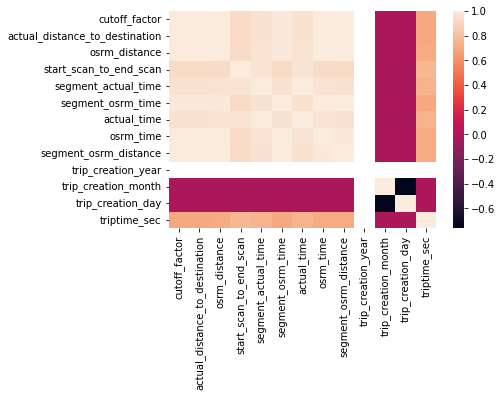

In [ ]:
#Heatmap of dataframe
sns.heatmap(data.corr())

In [ ]:
data.corr()

C:\Users\Pipaliya\AppData\Local\Temp\ipykernel_8836\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,triptime_sec
cutoff_factor,1.000000,0.999997,0.997444,0.921081,0.954552,0.988451,0.955434,0.994283,0.993405,NaN,-0.019440,-0.011132,0.703598
actual_distance_to_destination,0.999997,1.000000,0.997471,0.921345,0.954682,0.988498,0.955563,0.994361,0.993410,NaN,-0.019482,-0.011104,0.703577
osrm_distance,0.997444,0.997471,1.000000,0.927050,0.959676,0.992424,0.960492,0.997933,0.995036,NaN,-0.018993,-0.011031,0.704835
start_scan_to_end_scan,0.921081,0.921345,0.927050,1.000000,0.963516,0.921375,0.963525,0.929408,0.922120,NaN,-0.019450,-0.014236,0.765778
segment_actual_time,0.954552,0.954682,0.959676,0.963516,1.000000,0.954571,0.999978,0.959483,0.957497,NaN,-0.017506,-0.013692,0.745170
segment_osrm_time,0.988451,0.988498,0.992424,0.921375,0.954571,1.000000,0.955367,0.993647,0.996487,NaN,-0.019008,-0.010119,0.701954
actual_time,0.955434,0.955563,0.960492,0.963525,0.999978,0.955367,1.000000,0.960269,0.958320,NaN,-0.017533,-0.013676,0.745080
osrm_time,0.994283,0.994361,0.997933,0.929408,0.959483,0.993647,0.960269,1.000000,0.992408,NaN,-0.020042,-0.010269,0.704238
segment_osrm_distance,0.993405,0.993410,0.995036,0.922120,0.957497,0.996487,0.958320,0.992408,1.000000,NaN,-0.019023,-0.010496,0.707998
trip_creation_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='triptime_sec', ylabel='start_scan_to_end_scan'>

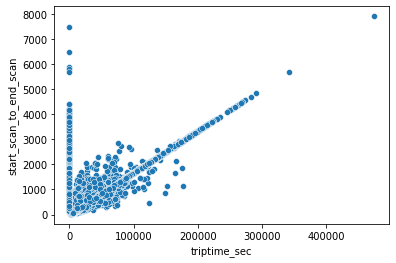

In [ ]:
#Visualization of triptime and start_scan_to_end_scan
sns.scatterplot(x=data["triptime_sec"], y=data["start_scan_to_end_scan"])

# Hypothesis Testiing

Pearson Test between triptime and start_scan_to_end_scan

H0: Both Variables are not correlated

Ha: Both variables are correlated

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
test_statistics,p_value=pearsonr(data["triptime_sec"], data["start_scan_to_end_scan"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Both Variables are correlated")
else:
    print("Fail to Reject Null Hypothesis,Both Variables are not correlated")

0.0
Reject Null Hypotheis, Both Variables are correlated


<AxesSubplot: xlabel='actual_distance_to_destination', ylabel='actual_time'>

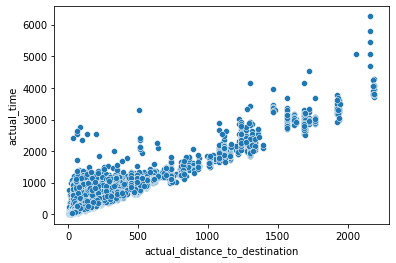

In [ ]:
#Visualization between distance and time
sns.scatterplot(x=data["actual_distance_to_destination"],y=data["actual_time"])

Pearson Test actual_time and actual_distance_to_destination

H0: Both Variables are not correlated

Ha: Both variables are correlated

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
test_statistics,p_value=pearsonr(data["actual_time"],data["actual_distance_to_destination"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Both Variables are correlated")
else:
    print("Fail to Reject Null Hypothesis,Both Variables are not correlated")

0.0
Reject Null Hypotheis, Both Variables are correlated


<AxesSubplot: xlabel='actual_time', ylabel='osrm_time'>

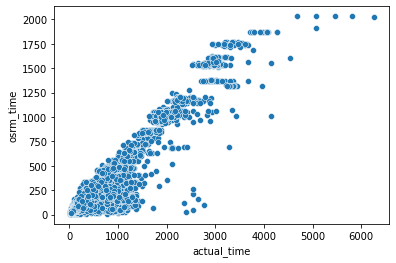

In [ ]:
#Visualization between distance and time
sns.scatterplot(x=data["actual_time"],y=data["osrm_time"])

T-Test for actual_time and osrm_time

H0: Mean of actual_time and osrm_time are same (mu_1 = mu_2)

Ha: Mean of actual_time is higher than osrm_time (mu_1 > mu_2)

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
test_statistics,p_value=ttest_ind(data["actual_time"],data["osrm_time"], alternative="greater")
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Mean of actual_time and osrm_time are same")
else:
    print("Fail to Reject Null Hypothesis,ean of actual_time is higher than osrm_time")

1.0113592493195362e-274
Reject Null Hypotheis, Mean of actual_time and osrm_time are same


Pearson Test actual_time and osrm_time

H0: Both Variables are not correlated

Ha: Both variables are correlated

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
test_statistics,p_value=pearsonr(data["actual_time"],data["osrm_time"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Both Variables are correlated")
else:
    print("Fail to Reject Null Hypothesis,Both Variables are not correlated")

0.0
Reject Null Hypotheis, Both Variables are correlated


T-Test for actual_time and segment_actual_time

H0: Mean of actual_time and segment_actual_time are same (mu_1 = mu_2)

Ha: Mean of actual_time and segment_actual_time are not same (mu_1 != mu_2)

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
test_statistics,p_value=ttest_ind(data["actual_time"],data["segment_actual_time"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Mean of actual_time and segment_actual_time are not same")
else:
    print("Fail to Reject Null Hypothesis,Mean of actual_time and segment_actual_time are same")

0.6419956696137739
Fail to Reject Null Hypothesis,Mean of actual_time and segment_actual_time are same


T-Test for osrm_time and segment_osrm_time

H0: Mean of osrm_time and segment_osrm_time are same (mu_1 = mu_2)

Ha: Mean of osrm_time and segment_osrm_time are not same (mu_1 != mu_2)

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
test_statistics,p_value=ttest_ind(data["osrm_time"],data["segment_osrm_time"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Mean of osrm_time and segment_osrm_time are not same")
else:
    print("Fail to Reject Null Hypothesis,Mean of osrm_time and segment_osrm_time are same")

1.541327181059453e-07
Reject Null Hypotheis, Mean of osrm_time and segment_osrm_time are not same


T-Test for osrm_distance and segment_osrm_distance

H0: Mean of osrm_distance and segment_osrm_distance are same (mu_1 = mu_2)

Ha: Mean of osrm_distance and segment_osrm_distance are not same (mu_1 != mu_2)

In [ ]:
#Let us set siginificance level 0.05, confidence level 95%
alpha=0.05

In [ ]:
test_statistics,p_value=ttest_ind(data["osrm_distance"],data["segment_osrm_distance"])
print(p_value)
if p_value < alpha:
    print("Reject Null Hypotheis, Mean of osrm_distance and segment_osrm_distance are not same")
else:
    print("Fail to Reject Null Hypothesis,Mean of osrm_distance and segment_osrm_distance are same")

0.0001606670222265932
Reject Null Hypotheis, Mean of osrm_distance and segment_osrm_distance are not same


# Outliers Detection Using IQR Method

<AxesSubplot: >

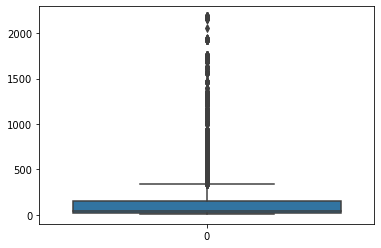

In [ ]:
sns.boxplot(data["actual_distance_to_destination"])

<AxesSubplot: >

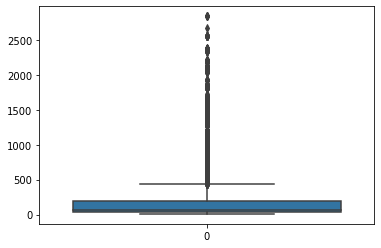

In [ ]:
sns.boxplot(data["osrm_distance"])

<AxesSubplot: >

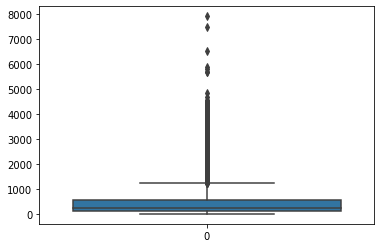

In [ ]:
sns.boxplot(data["start_scan_to_end_scan"])

<AxesSubplot: >

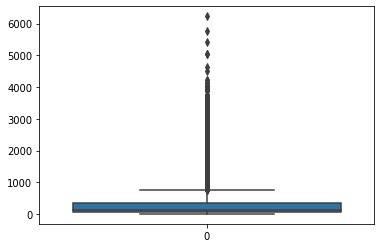

In [ ]:
sns.boxplot(data["segment_actual_time"])

<AxesSubplot: >

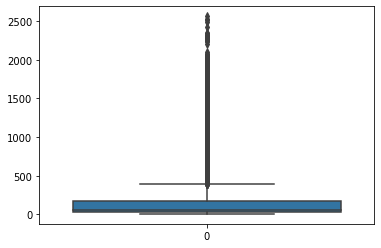

In [ ]:
sns.boxplot(data["segment_osrm_time"])

<AxesSubplot: >

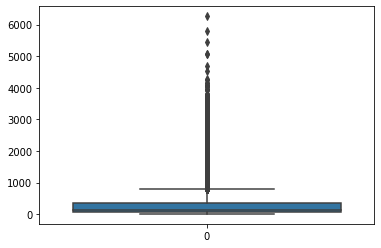

In [ ]:
sns.boxplot(data["actual_time"])

<AxesSubplot: >

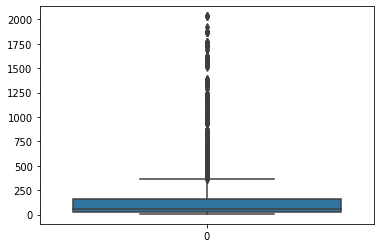

In [ ]:
sns.boxplot(data["osrm_time"])

<AxesSubplot: >

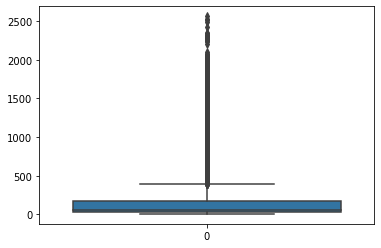

In [ ]:
sns.boxplot(data["segment_osrm_time"])

<AxesSubplot: >

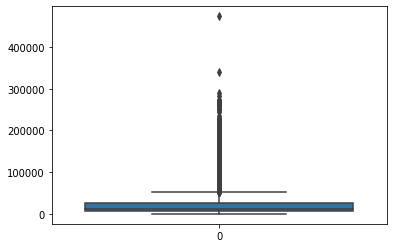

In [ ]:
sns.boxplot(data["triptime_sec"])

In [ ]:
data.describe()

,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,trip_time,triptime_sec
count,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.000000,13892.0,13892.000000,13892.000000,13892,13892.000000
mean,159.986251,160.852618,200.437664,515.603657,346.118557,176.627627,349.267492,157.980564,218.437771,2018.0,9.114310,18.547653,0 days 06:45:04.119232843,24304.119233
std,307.520122,307.627703,373.619022,660.357703,561.918712,316.580388,567.051777,274.050917,419.933226,0.0,0.318199,7.753191,0 days 09:33:47.061593031,34427.061593
min,9.000000,9.002461,9.072900,23.000000,9.000000,6.000000,9.000000,6.000000,9.072900,2018.0,9.000000,1.000000,0 days 00:00:00,0.000000
25%,21.000000,22.037144,29.802900,144.000000,64.000000,30.000000,65.000000,29.000000,31.349950,2018.0,9.000000,14.000000,0 days 01:51:56.299656750,6716.299657
50%,46.000000,46.163919,61.108100,264.000000,136.000000,62.000000,138.000000,57.500000,65.614850,2018.0,9.000000,20.000000,0 days 03:30:54.417636,12654.417636
75%,148.000000,149.281573,193.689125,595.000000,349.000000,176.000000,353.000000,163.250000,204.588700,2018.0,9.000000,25.000000,0 days 07:04:21.465968500,25461.465969
max,2185.000000,2187.483994,2840.081000,7898.000000,6230.000000,2564.000000,6265.000000,2032.000000,3523.632400,2018.0,10.000000,30.000000,5 days 11:38:33.117274,473913.117274


# Outliers Treatment

In [ ]:
#Let's remove outliers using IQR Method
sses25th = 44
sses75th = 595
iqr = sses75th - sses25th
ssesuw = sses75th +1.5*iqr
ssesuw

1421.5

In [ ]:
data[data["start_scan_to_end_scan"]> ssesuw]

,route_type,trip_uuid,trip_creation_time,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_factor,...,actual_time,osrm_time,segment_osrm_distance,source_state,destination_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_time,triptime_sec
875,Carting,trip-153688139008597141,2018-10-03 20:11:38.080296,IND395023AAD,Surat_Central_I_4 (Gujarat),IND396321AAA,Bilimora_DC (Gujarat),2018-09-13 23:29:50.086266,2018-09-14 02:58:24.884963,137,...,1108.0,145.0,271.4230,Gujarat,Gujarat,2018.0,10.0,3.0,0 days 03:28:34.798697,12514.798697
1187,Carting,trip-153695358056452857,2018-09-28 21:57:19.197648,IND431112AAB,Sillod_ZebaTWR_D (Maharashtra),IND431203AAA,Jalna_BhgyaNgr_D (Maharashtra),2018-09-15 04:40:33.384907,2018-09-16 01:06:53.762074,207,...,586.0,169.0,295.9635,Maharashtra,Maharashtra,2018.0,9.0,28.0,0 days 20:26:20.377167,73580.377167
1221,Carting,trip-153695825653985603,2018-09-30 07:30:32.488364,IND530012AAA,Visakhapatnam_Gajuwaka_IP (Andhra Pradesh),IND530012AAA,Visakhapatnam_Gajuwaka_IP (Andhra Pradesh),2018-09-14 20:50:56.540060,2018-09-15 23:00:45.715950,194,...,303.0,169.0,228.7358,Andhra Pradesh,Andhra Pradesh,2018.0,9.0,30.0,1 days 02:09:49.175890,94189.175890
1316,Carting,trip-153696880159964742,2018-09-21 20:55:53.211057,IND395023AAD,Surat_Central_I_4 (Gujarat),IND396321AAA,Bilimora_DC (Gujarat),2018-09-14 23:46:41.600072,2018-09-15 03:21:56.351119,113,...,258.0,127.0,206.7191,Gujarat,Gujarat,2018.0,9.0,21.0,0 days 03:35:14.751047,12914.751047
1402,Carting,trip-153697923702522443,2018-09-23 15:30:38.146740,IND211002AAB,Allahabad_Central_H_1 (Uttar Pradesh),IND212402AAA,Phulpur_Shekhpur_D (Uttar Pradesh),2018-09-15 02:40:37.025475,2018-09-15 07:54:57.848178,93,...,1204.0,90.0,117.4880,Uttar Pradesh,Uttar Pradesh,2018.0,9.0,23.0,0 days 05:14:20.822703,18860.822703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14744,FTL,trip-153860352246282031,2018-09-24 05:06:56.558662,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND712311AAA,Kolkata_Dankuni_HB (West Bengal),2018-10-03 21:52:02.463089,2018-10-05 09:06:25.403171,1300,...,1930.0,1016.0,1497.6331,Haryana,West Bengal,2018.0,9.0,24.0,1 days 11:14:22.940082,126862.940082
14748,FTL,trip-153860451596867762,2018-09-24 05:06:56.558662,IND712311AAA,Kolkata_Dankuni_HB (West Bengal),IND712311AAA,Kolkata_Dankuni_HB (West Bengal),2018-10-03 22:08:35.968978,2018-10-04 22:26:30.408004,159,...,1342.0,145.0,197.2656,West Bengal,West Bengal,2018.0,9.0,24.0,1 days 00:17:54.439026,87474.439026
14754,FTL,trip-153860570045461434,2018-09-24 05:06:56.558662,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND834002AAB,Ranchi_Hub (Jharkhand),2018-10-03 22:28:20.454881,2018-10-05 08:39:47.996375,1010,...,1625.0,851.0,1222.2127,Haryana,Jharkhand,2018.0,9.0,24.0,1 days 10:11:27.541494,123087.541494
14764,FTL,trip-153860698042160875,2018-09-24 05:06:56.558662,IND131028AAB,Sonipat_Kundli_H (Haryana),IND131028AAB,Sonipat_Kundli_H (Haryana),2018-10-05 08:35:15.664489,2018-10-05 08:35:15.664489,1321,...,2003.0,1166.0,1747.4544,Haryana,Haryana,2018.0,9.0,24.0,0 days 00:00:00,0.000000


In [ ]:
#We will drop outliers which we have found using IQR Method
data.drop(data[data["start_scan_to_end_scan"]> ssesuw].index, inplace=True)

In [ ]:
data.describe()

,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,trip_time,triptime_sec
count,12852.000000,12852.000000,12852.000000,12852.000000,12852.000000,12852.000000,12852.000000,12852.000000,12852.000000,12852.0,12852.000000,12852.000000,12852,12852.000000
mean,88.108077,88.962952,113.436786,363.109088,216.271709,103.763305,218.170557,94.566838,121.064327,2018.0,9.114846,18.584967,0 days 05:00:24.581706652,18024.581707
std,108.676646,108.964263,135.904653,320.783878,237.050219,117.762542,238.554090,105.277546,146.155991,0.0,0.318848,7.786337,0 days 04:58:46.808724515,17926.808725
min,9.000000,9.002461,9.072900,23.000000,9.000000,6.000000,9.000000,6.000000,9.072900,2018.0,9.000000,1.000000,0 days 00:00:00,0.000000
25%,21.000000,21.513693,28.613375,137.000000,61.000000,28.000000,62.000000,27.750000,29.653100,2018.0,9.000000,14.000000,0 days 01:51:31.947565250,6691.947565
50%,39.000000,39.995569,51.578350,240.000000,119.000000,56.000000,120.000000,52.000000,56.815650,2018.0,9.000000,20.000000,0 days 03:21:36.093887,12096.093887
75%,117.000000,118.535713,151.928175,471.000000,282.000000,144.000000,284.000000,125.000000,159.915625,2018.0,9.000000,25.000000,0 days 06:17:26.963298250,22646.963298
max,830.000000,830.517272,970.943400,1421.000000,1372.000000,867.000000,1372.000000,712.000000,1150.617300,2018.0,10.000000,30.000000,2 days 01:09:57.136511,176997.136511


Here We can observe that by removing outliers in start_scan_to_end_scan column, other columns max values has been decreased significantly and further dropping columns will lead to loss of valuable data

# Data Encoding

In [ ]:
data_encoding=data.copy()

In [ ]:
data_encoding.shape

(12852, 25)

# Label Encoding

In [ ]:
#Here We will use label encoder for encoding route_type column
le = LabelEncoder()

In [ ]:
col="route_type"
data_encoding[col].value_counts()

Carting    8503
FTL        4349
Name: route_type, dtype: int64

In [ ]:
data_encoding[col]=le.fit_transform(data_encoding[col])
data_encoding[col].value_counts()

0    8503
1    4349
Name: route_type, dtype: int64

# Target Encoding

In [ ]:
from category_encoders import TargetEncoder

In [ ]:
te=TargetEncoder()

In [ ]:
#Here we will do target encoding for "source_center","source_name","destination_center","destination_name","source_state","destination_state" columns
columns=["source_center","source_name","destination_center","destination_name","source_state","destination_state"]
for col in columns:
    data_encoding[col]=te.fit_transform(data_encoding[col], data_encoding["route_type"])

In [ ]:
data_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12852 entries, 0 to 14786
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   route_type                      12852 non-null  int32          
 1   trip_uuid                       12852 non-null  object         
 2   trip_creation_time              12852 non-null  datetime64[ns] 
 3   source_center                   12852 non-null  float64        
 4   source_name                     12852 non-null  float64        
 5   destination_center              12852 non-null  float64        
 6   destination_name                12852 non-null  float64        
 7   od_start_time                   12852 non-null  datetime64[ns] 
 8   od_end_time                     12852 non-null  datetime64[ns] 
 9   cutoff_factor                   12852 non-null  int64          
 10  actual_distance_to_destination  12852 non-null  float64   

In [ ]:
data_encoding.drop(["trip_uuid","trip_creation_time","od_start_time","od_end_time","trip_time"],axis=1, inplace=True)

In [ ]:
data_encoding

,route_type,source_center,source_name,destination_center,destination_name,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,source_state,destination_state,trip_creation_year,trip_creation_month,trip_creation_day,triptime_sec
0,0,0.233481,0.233481,2.405789e-01,2.405789e-01,72,73.186911,85.1110,180.0,141.0,65.0,143.0,68.0,84.1894,0.132353,0.167293,2018.0,9.0,20.0,0.000000
1,0,0.026667,0.026667,5.140380e-08,5.140380e-08,17,17.175274,19.6800,100.0,59.0,16.0,59.0,15.0,19.8766,0.213544,0.189456,2018.0,9.0,20.0,6029.696112
2,0,0.265919,0.265919,2.943634e-01,2.943634e-01,24,24.597048,28.0647,189.0,60.0,23.0,61.0,23.0,28.0647,0.263959,0.277888,2018.0,9.0,20.0,0.000000
3,0,0.019398,0.019398,2.261087e-01,2.261087e-01,9,9.100510,12.0184,98.0,24.0,13.0,24.0,13.0,12.0184,0.263959,0.277888,2018.0,9.0,20.0,5880.338041
4,0,0.000924,0.000924,4.186833e-06,4.186833e-06,22,22.424210,28.9203,146.0,64.0,34.0,64.0,34.0,28.9203,0.132353,0.167293,2018.0,9.0,20.0,10586.899446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14778,1,0.432241,0.432241,8.583065e-01,8.583065e-01,143,144.794266,191.0458,852.0,270.0,136.0,272.0,139.0,172.9107,0.417819,0.398413,2018.0,9.0,24.0,51184.266566
14780,1,0.636225,0.636225,9.449722e-01,9.449722e-01,174,176.546661,220.3007,678.0,378.0,194.0,378.0,192.0,212.8530,0.456364,0.505843,2018.0,9.0,24.0,40779.500123
14783,1,0.888157,0.888157,8.955545e-01,8.955545e-01,192,194.552260,229.2052,1017.0,845.0,178.0,847.0,178.0,232.5811,0.940594,0.940594,2018.0,9.0,24.0,61169.217828
14785,1,0.636225,0.636225,6.362248e-01,6.362248e-01,84,84.743813,102.3828,256.0,186.0,92.0,187.0,92.0,107.6915,0.456364,0.505843,2018.0,9.0,24.0,0.000000


# Standardization

In [ ]:
#Here We will use MinMaxScaler method for standardizing dataframe
scaler=MinMaxScaler()
std_data=scaler.fit_transform(data_encoding)
std_data=pd.DataFrame(std_data, columns=data_encoding.columns)

In [ ]:
std_data

,route_type,source_center,source_name,destination_center,destination_name,cutoff_factor,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,segment_actual_time,segment_osrm_time,actual_time,osrm_time,segment_osrm_distance,source_state,destination_state,trip_creation_year,trip_creation_month,trip_creation_day,triptime_sec
0,0.0,0.234251,0.234251,2.521111e-01,2.521111e-01,0.076736,0.078129,0.079052,0.112303,0.096845,0.068525,0.098313,0.087819,0.065803,0.108790,0.094519,0.0,0.0,0.655172,0.000000
1,0.0,0.026755,0.026755,5.386383e-08,5.386383e-08,0.009744,0.009948,0.011028,0.055079,0.036684,0.011614,0.036684,0.012748,0.009464,0.197365,0.118627,0.0,0.0,0.655172,0.034067
2,0.0,0.266796,0.266796,3.084738e-01,3.084738e-01,0.018270,0.018983,0.019745,0.118741,0.037417,0.019744,0.038151,0.024079,0.016637,0.252366,0.214823,0.0,0.0,0.655172,0.000000
3,0.0,0.019462,0.019462,2.369473e-01,2.369473e-01,0.000000,0.000119,0.003062,0.053648,0.011005,0.008130,0.011005,0.009915,0.002580,0.252366,0.214823,0.0,0.0,0.655172,0.033223
4,0.0,0.000928,0.000928,4.387526e-06,4.387526e-06,0.015834,0.016338,0.020634,0.087983,0.040352,0.032520,0.040352,0.039660,0.017386,0.108790,0.094519,0.0,0.0,0.655172,0.059814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12847,1.0,0.433666,0.433666,8.994497e-01,8.994497e-01,0.163216,0.165294,0.189186,0.592990,0.191489,0.150987,0.192957,0.188385,0.143523,0.420218,0.345928,0.0,0.0,0.793103,0.289181
12848,1.0,0.638322,0.638322,9.902697e-01,9.902697e-01,0.200974,0.203945,0.219601,0.468526,0.270726,0.218351,0.270726,0.263456,0.178513,0.462268,0.462789,0.0,0.0,0.793103,0.230396
12849,1.0,0.891085,0.891085,9.384832e-01,9.384832e-01,0.222899,0.225863,0.228859,0.711016,0.613353,0.199768,0.614820,0.243626,0.195795,0.990537,0.935705,0.0,0.0,0.793103,0.345594
12850,1.0,0.638322,0.638322,6.667225e-01,6.667225e-01,0.091352,0.092197,0.097009,0.166667,0.129861,0.099884,0.130594,0.121813,0.086391,0.462268,0.462789,0.0,0.0,0.793103,0.000000


# Business Insights

By doing Hypothesis testing between osrm data and actual data, we can observe that mean of both data is not the same.

Distance and time attributes are highly correlated, so its obvious that distance between places will matter in speedy delivery

Maximum orders are found from Maharashtra, so we can say more customers in the state.

Minimum trips are from North-Eastern states so business needs improvement in that states

The busiest warehouses are Gurgaon_Bilaspur, Bhiwandi, and Bangalore, So, They should be more focused.

The Busiest route is Bangalore_Nalamngla_H (Karnataka) to Bengaluru_KGAirport_HB (Karnataka). The average distance between them is 28.03  and the average time taken for the given trip is 87.87

# Recommendations

From the above analysis, It can be observed that the actual time taken for delivery is higher compared to osrm time. So we can optimize our services using osrm.

We have the busiest route in Bangaluru, so we can increase our service by providing different outlets and increasing the manpower

In Maharashtra, we have the highest number of trips, so we should increase outlets in the state.

In North-Eastern states, we have very less business, so we need to optimize their condition and also provide marketing to increase services.

We have the busiest warehouse in Gurgaon_Bilaspur, so we need to increase the number of warehouses or increase manpower to efficiently handle the load.

OSRM provides us best minimal distance